# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [2]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import panel as pn
from pathlib import Path
from dotenv import load_dotenv

# Initialize the Panel Extensions (for Plotly)


Bad key "text.kerning_factor" on line 4 in
C:\Users\dovu9\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [1]:
import hvplot.pandas


In [3]:
pip install matplotlib 


The following command must be run outside of the IPython shell:

    $ pip install matplotlib 

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [4]:
import plotly.express as px
pn.extension('plotly')

In [38]:
# Read the Mapbox API key
load_dotenv()

True

# Import Data

In [70]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.reset_index(inplace = True)

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.set_index("Neighborhood", inplace = True)


In [71]:
df_neighborhood_locations.head()

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [79]:
# Define Panel Visualization Functions
def housing_units_per_year(data_file):
    """Housing Units Per Year."""
#     this works
    
    filtered_housing_units = data_file.filter(["year", "housing_units"]).groupby("year").mean()
    min_filtered_housing_units = filtered_housing_units.min()["housing_units"]
    max_filtered_housing_units = filtered_housing_units.max()["housing_units"]
    std_filtered_housing_units = filtered_housing_units.std()["housing_units"]
    filtered_housing_units.plot.bar(
                                    ylim = (min_filtered_housing_units - std_filtered_housing_units, max_filtered_housing_units + std_filtered_housing_units), 
                                    title = "Mean Housing Units in San Fransico from 2010 to 2016", 
                                    figsize = (8, 6)
                                    )

def average_gross_rent(data_file):
    """Average Gross Rent in San Francisco Per Year."""
#     this works
    
    filtered_gross_rent = data_file.filter(["year", "gross_rent"]).groupby("year").mean()
    filtered_gross_rent.plot.line(xlim = (2009.5, 2016.5),
                                  title = "Average Gross Rent in San Francisco", 
                                  figsize = (8, 6)
                                 )

def average_sales_price(data_file):
    """Average Sales Price Per Year."""
#     this works
    
    filtered_sqr_price = data_file.filter(["year", "sale_price_sqr_foot"]).groupby("year").mean()
    filtered_sqr_price.plot.line(xlim = (2009.5, 2016.5),
                                 title = "Average Sale Price per Square Foot in San Francisco", 
                                 figsize = (8, 6)
                                )

def average_price_by_neighborhood(data_file):
    """Average Prices by Neighborhood."""
#     this works
    
    neighborhood_prices = data_file.filter(["year", "neighborhood", "sale_price_sqr_foot"]).groupby(["year", "neighborhood"]).mean()
    return neighborhood_prices.hvplot.line(x = "year", y = "sale_price_sqr_foot", groupby = "neighborhood")

def top_most_expensive_neighborhoods(data_file):
    """Top 10 Most Expensive Neighborhoods."""
#     this works
    
    top_10_expensive = data_file.filter(["neighborhood", "sale_price_sqr_foot"]).groupby("neighborhood").mean()
    top_10_expensive = top_10_expensive.sort_values(by = "sale_price_sqr_foot", ascending = False).head(10)
    max_top_10_expensive = top_10_expensive.max()["sale_price_sqr_foot"]
    min_top_10_expensive = top_10_expensive.min()["sale_price_sqr_foot"]
    std_top_10_expensive = top_10_expensive.std()["sale_price_sqr_foot"]
    return top_10_expensive.plot.bar(
                             ylim = (min_top_10_expensive - std_top_10_expensive, max_top_10_expensive + std_top_10_expensive),
                             title = "Top 10 Expensive Neighborhoods by Square Foot Price",
                             figsize = (8, 6)
                             )

def parallel_coordinates(data_file):
    """Parallel Coordinates Plot."""
#     this works
    
    top_10_expensive = data_file.filter(["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"]).groupby("neighborhood").mean()
    top_10_expensive = top_10_expensive.sort_values(by = "sale_price_sqr_foot", ascending = False).head(10)
    return px.parallel_coordinates(top_10_expensive, color='sale_price_sqr_foot')

def parallel_categories(data_file):
    """Parallel Categories Plot."""
#     this does work
    
    top_10_expensive = data_file.filter(["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"]).groupby("neighborhood").mean()
    top_10_expensive = top_10_expensive.sort_values(by = "sale_price_sqr_foot", ascending = False).head(10)
    top_10_expensive.reset_index(inplace = True)
    return px.parallel_categories(
        top_10_expensive,
        dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
        color="sale_price_sqr_foot",
        labels={
            "neighborhood": "Neighborhood",
            "sale_price_sqr_foot": "Sale Price/Sqr Foot",
            "housing_units": "Housing Units",
#             "gross_rent": "Gross Rent"
        },
        )

def neighborhood_map(data_file, coordinates):
    """Neighborhood Map"""
#     this does not work
    
    neighborhood_data = data_file.filter(["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"]).groupby("neighborhood").mean()
    joined_neighborhood = pd.concat((neighborhood_data, coordinates), join = "inner", axis = "columns")
    joined_neighborhood.index.name = "Neighborhood"
    joined_neighborhood.reset_index(inplace = True)
    mapbox_token = os.getenv("MAPBOX")
    px.set_mapbox_access_token(mapbox_token)
    return px.scatter_mapbox(
                 joined_neighborhood,
                 lat = "Lat",
                 lon = "Lon",
                 size = "sale_price_sqr_foot",
                 color = "gross_rent",
                 zoom = 10.5,
                 text = "Neighborhood",
                 title = "Average Sale Price Per Square Foot and Gross Rent in San Francisco",
                 )

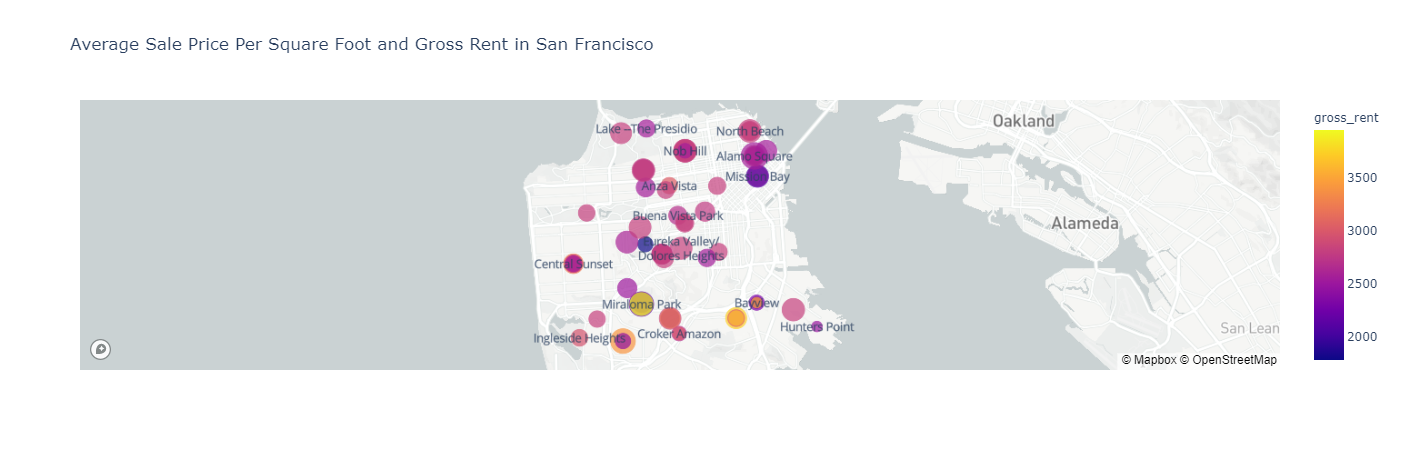

In [80]:
# testing out the functions
neighborhood_map(sfo_data, df_neighborhood_locations)

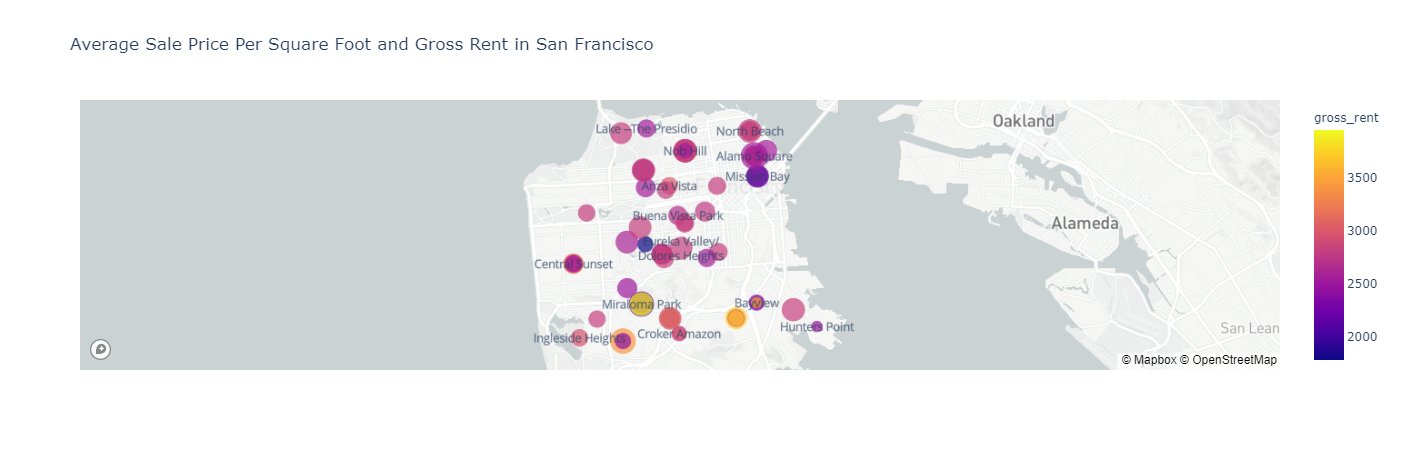

In [78]:
neighborhood_data = sfo_data.filter(["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"]).groupby("neighborhood").mean()
joined_neighborhood = pd.concat((neighborhood_data, df_neighborhood_locations), join = "inner", axis = "columns")
df_neighborhood_locations.head()
#     neighborhood_data
#     df_neighborhood_locations
#     joined_neighborhood
joined_neighborhood.index.name = "Neighborhood"
joined_neighborhood.reset_index(inplace=True)
mapbox_token = os.getenv("MAPBOX")
px.set_mapbox_access_token(mapbox_token)
px.scatter_mapbox(
                 joined_neighborhood,
                 lat = "Lat",
                 lon = "Lon",
                 size = "sale_price_sqr_foot",
                 color = "gross_rent",
                 zoom = 10.5,
                 text = "Neighborhood",
                 title = "Average Sale Price Per Square Foot and Gross Rent in San Francisco",
                 )
# joined_neighborhood

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [5]:
# YOUR CODE HERE!

## Serve the Panel Dashboard

Column(width=900)
    [0] Row
        [0] Markdown(str, width=800)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] Plotly(ExpressFigure)
        [1] Row
            [0] Matplotlib(Figure, tight=True)
            [1] Matplotlib(Figure, tight=True)
            [2] Matplotlib(Figure, tight=True)
        [2] Column
            [0] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
            [1] HoloViews(Bars)
        [3] Column(width=960)
            [0] Plotly(ExpressFigure)
            [1] Plotly(ExpressFigure)
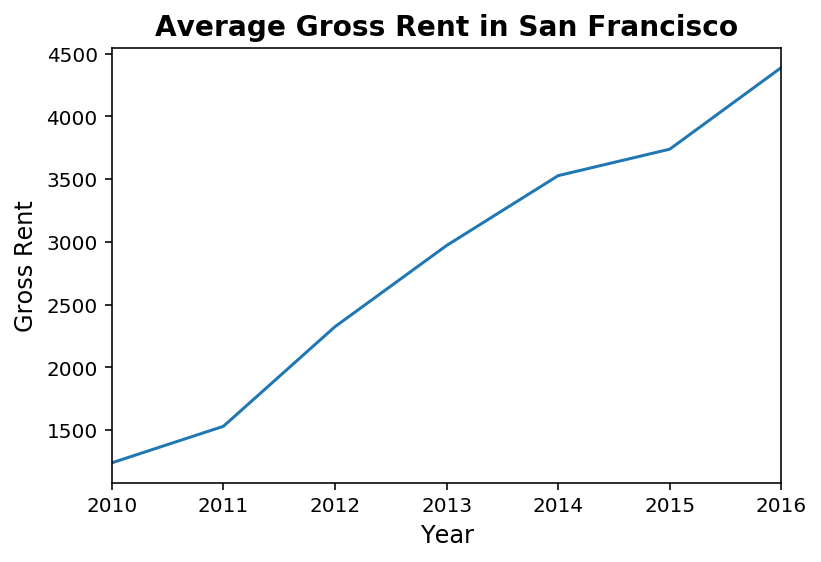
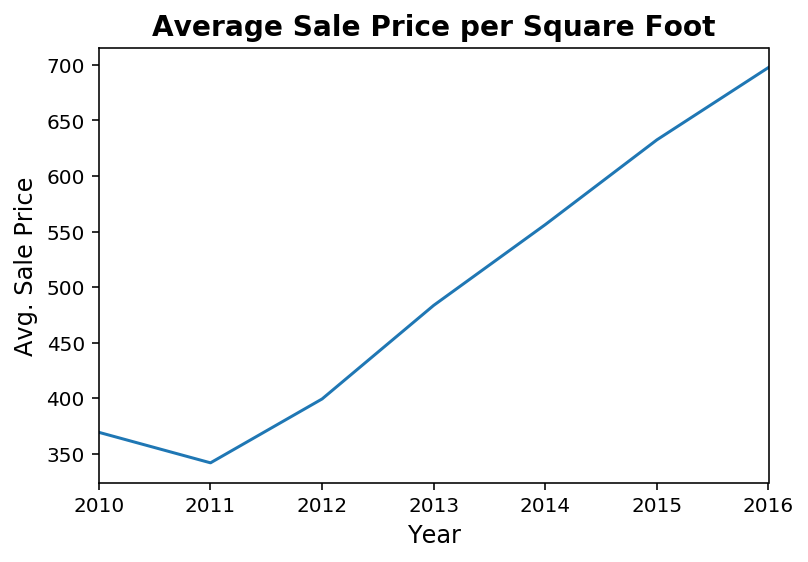
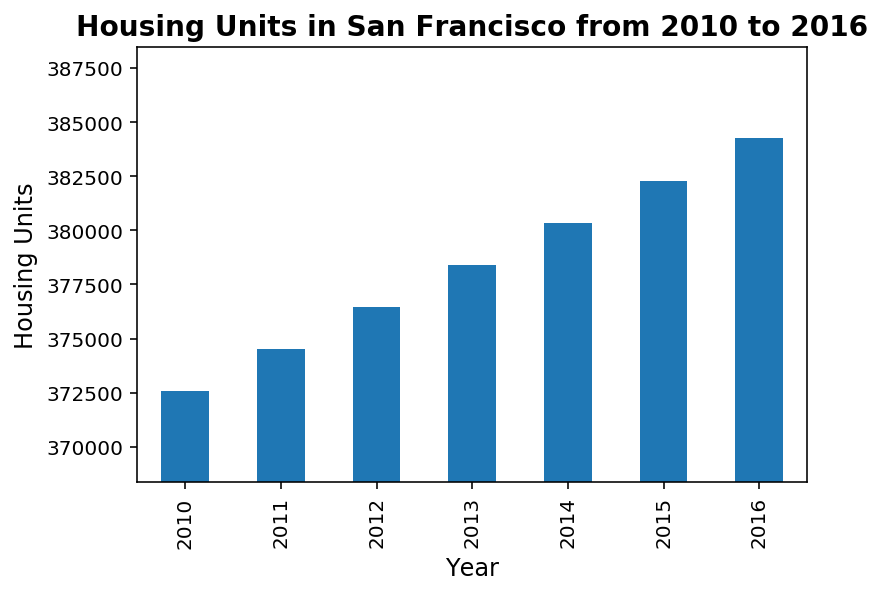

In [6]:
panel.servable()